<a href="https://colab.research.google.com/github/Shahid0120/pytorch-mini-projects/blob/main/linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Doing Linear Regression using Pytorch

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

X shape : torch.Size([4000])
Y.shape: torch.Size([4000])


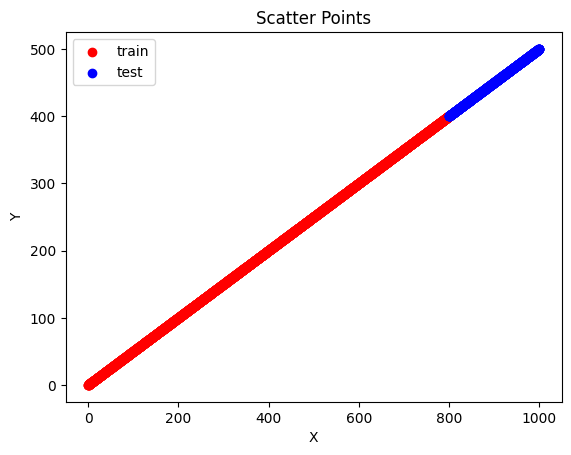

In [7]:
torch.manual_seed(2)
w = 0.5
b = 0.3

X = torch.arange(0, 1000, 0.25)
Y = w * X + b

# Check shape
print(f"X shape : {X.shape}")
print(f"Y.shape: {Y.shape}")

# Split data
split = int(len(X) * 0.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]


plt.figure()
plt.scatter(X_train, Y_train, color='red', label='train')
plt.scatter(X_test, Y_test, color='blue', label='test')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Points")
plt.legend()
plt.show()


In [8]:
# buildling a LinearRegression class using Pytorch
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [9]:
# Reproducability
torch.manual_seed(1)

# Create instance of the model class
model = LinearRegressionModel()

# Check parameters
list(model.parameters())

[Parameter containing:
 tensor([0.6614], requires_grad=True),
 Parameter containing:
 tensor([0.2669], requires_grad=True)]

In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([0.2669]))])

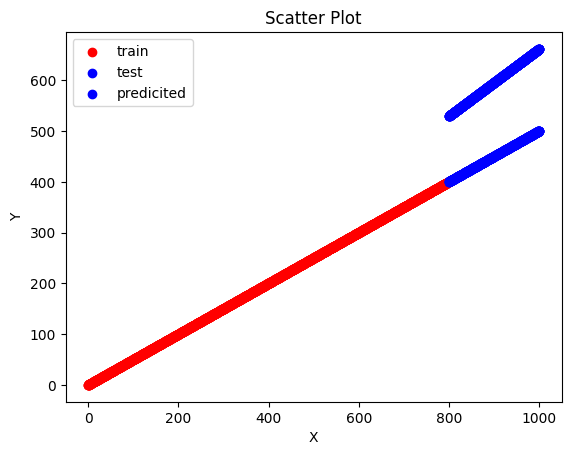

The MSE of initialised paramaters is : 116130.953125


In [11]:
# Checking Initialized Parameters using torch.inference_mode()

with torch.inference_mode():
  Y_hat = model(X_test)

plt.figure()
plt.scatter(X_train, Y_train, color='red', label='train')
plt.scatter(X_test, Y_test, color='blue', label='test')
plt.scatter(X_test, Y_hat, color='blue', label='predicited')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")
plt.legend()
plt.show()


MAE = torch.sum(torch.abs(Y_test - Y_hat))

print(f"The MSE of initialised paramaters is : {MAE}")


In [12]:
import torch
import torch.nn as nn

# Set random seed for reproducibility
torch.manual_seed(42)

# loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
epochs = 200
test_loss = []
train_loss = []


for epoch in range(epochs):
    # Set the model to training mode
    model.train()

    # Make predictions
    Y_hat = model(X_train)

    # Calculate loss
    loss = loss_fn(Y_hat, Y_train)
    train_loss.append(loss.item())

    # Zero the gradients before backward pass
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Update model parameters
    optimizer.step()

    # Testing
    model.eval()

    # Checking Training loss
    with torch.inference_mode():
      Y_pred_test = model(X_test)

      loss_test = loss_fn(Y_pred_test, Y_test)

      test_loss.append(loss_test.item())


In [13]:
print(train_loss)

[64.4876480102539, 64.08677673339844, 63.68589782714844, 63.285037994384766, 62.8841438293457, 62.483299255371094, 62.08243179321289, 61.681556701660156, 61.28068542480469, 60.879825592041016, 60.47895812988281, 60.078086853027344, 59.67721176147461, 59.27634811401367, 58.875484466552734, 58.474605560302734, 58.0737419128418, 57.672874450683594, 57.272010803222656, 56.87113952636719, 56.47026824951172, 56.069393157958984, 55.66853332519531, 55.26766586303711, 54.86678695678711, 54.46592330932617, 54.0650634765625, 53.66419982910156, 53.26332092285156, 52.862449645996094, 52.46159362792969, 52.06072235107422, 51.659847259521484, 51.25897979736328, 50.858123779296875, 50.457252502441406, 50.05637741088867, 49.655513763427734, 49.25465393066406, 48.853790283203125, 48.45291519165039, 48.052040100097656, 47.65117263793945, 47.25031661987305, 46.84944152832031, 46.448570251464844, 46.047706604003906, 45.6468391418457, 45.245975494384766, 44.8451042175293, 44.44422912597656, 44.0433807373046

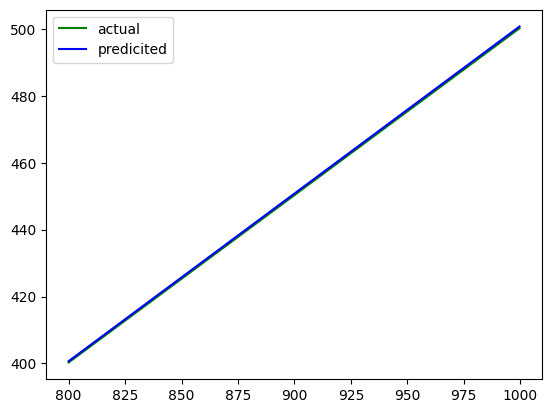

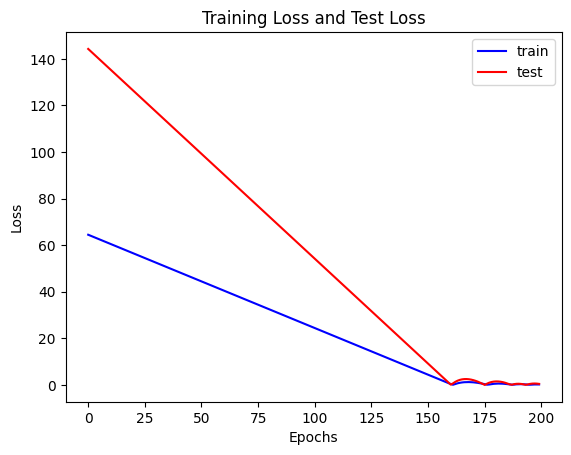

In [14]:
with torch.inference_mode():
  y_pred_test = model(X_test)

plt.figure(1)
plt.plot(X_test,Y_test, label='actual', color='green')
plt.plot(X_test, y_pred_test, label='predicited', color='blue')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(epochs), train_loss, color='blue', label='train')
plt.plot(np.arange(epochs), test_loss, color='red', label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss and Test Loss')
plt.legend()
plt.show()

In [15]:
model.state_dict()

OrderedDict([('weights', tensor([0.5007])), ('bias', tensor([0.1118]))])

In [16]:
# Saving and Loading model parameters
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_linear_regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('model/01_pytorch_linear_regression.pth')

In [24]:
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
model.state_dict()

OrderedDict([('weights', tensor([0.5007])), ('bias', tensor([0.1118]))])

In [22]:
# Loading Pytorch Model through state_dict()

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))




<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5007])), ('bias', tensor([0.1118]))])

In [25]:
# Checking Loaded Model
loaded_model_0.eval()
with torch.inference_mode():
  y_pred_loaded = loaded_model_0(X_test)

In [26]:
y_pred_loaded == y_pred_test

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr